<a href="https://colab.research.google.com/github/Steve-hub-dot/MI_laborok/blob/main/BSc_MI_labor_1_Kereses_2024_hallgatoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bevezetés és otthoni felkészülési anyag
## Célkitűzések

Jelen labor célja, hogy az MI területén széleskörűen alkalmazott problémamegoldó módszer, a keresés algoritmusait gyakorlatias megközelítésben saját implementáción keresztül bemutassa.

Keresést számos területen alkalmazunk: a legkézenfekvőbb és leginkább szemléletes így megoldható probléma az útvonalkeresés térképen, ezért a labor során is egy térképen fogunk utat keresni. Azonban sokkal komplexebb és általánosabb problémák is visszavezethetők keresésre: a tervkészítés során a tervek terében van lehetőség keresni, a logikai bizonyítások területén az ismert tényekből kiindulva kereshetünk új ismeretet vagy kereshetjük egy állítás bizonyítását a logika alapvető szabályait követve, és a sor még hosszan folytatható lenne.

## A keresési algoritmusok általános működése

## A problématér

Problématérnek nevezzük azt a teret, ahol magát a megoldandó problémát megfogalmazzuk. Egy térképen keresés során ez maga a térkép, míg például egy logikai levezetés keresése során ez az állítások halmaza és a felhasználható műveletek készlete alkotja a problémateret.

A problématér lehet véges nagyásgú, mint a térkép esetében, vagy lehet végtelen nagy, mint a logikai levezetések során (hiszen ha a logikai invertálás egy használható művelet, akkor tetszőleges logikai állítást végtelen sokszor invertálhatunk anélkül, hogy a problématér határait feszegetnénk).

Fontos látni, hogy annak ellenére, hogy esetleg a problématér maga véges, rajta futtatott keresések ettől még futhatnak végtelen sokáig: ha egy keresés hajlamos visszalépni egy korábban már felkeresett állapotba anélkül, hogy ezt észlelné, akkor minden adott ahhoz, hogy a célt sose érje el!


## A keresési tér

A keresési algoritmusok működéséhez önmagában nem elég a problématér, ugyanis a keresés futása során további adatokat is tárolnunk kell, amik nem a problémához, hanem a keresés aktuális futásához tartoznak: ilyen például, hogy a problématér bizonyos állapotba milyen korábbi állapotok láncolatán keresztül jutottunk el, hiszen ebből áll majd elő a problématérben megfogalmazott megoldás!

Az algoritmusok minden esetben egy keresési térben futnak. Fontos észrevenni, hogy még abban az esetben is, amikor egy térképen történő keresési problémával foglalkozunk, a térkép által reprezentált valóság tere, és a keresési tér eltérnek egymástól! Előbbi térbeli koordinátákkal leírható objektumokat tartalmaz, míg utóbbi egy absztrakt gráf formájú reprezentációja a valóságnak.

A keresés során mindig a keresési térben dolgoznak az algoritmusok, noha a keresési tér egyes pontjai általában megfeleltethetők a valóságos tér bizonyos pontjainak, a megfeleltetés sokszor nem egy az egyhez arányú: például ha egy valóságos térbeli ponthoz több út is létezik, akkor a problématér ugyanazon pontja a keresési tér több különböző pontjában is megjelenhet, és a keresési algoritmus feladata, hogy ezek azonosságát felismerje!

## A célteszt

A keresési algoritmus futása során a célteszt feladata eldönteni, hogy egy éppen bejárt csomópont célnak számít-e. Amennyiben igen, akkor a keresés visszaköveti az adott állapotba vezető utat, majd leáll.

A legegyszerűbb kereséseknél explicite megfogalmazható a célállapot, például a térképen keresve egy pontra rábökve mondhatjuk azt, hogy ez a pont a cél. Ebben az esetben egy egyszerű összehasonlítás a célteszt, ami jelez, ha a keresés során a célállapotba léptünk.

Bonyolultabb keresések esetén, lehet több vagy akár végtelen sok célállapot is. Ilyenkor a célteszt egy jóval bonyolultabb függvény, mely azonban továbbra is akkor ad vissza igaz értéket, amikor egy állapotra teljesülnek a céllal szembeni előírások.

## A keresések általános lefutása

A keresési algoritmusok első lépése mindig a kezdőállapot beállítása. Ezt követően a keresés iteratívan mindig újabb állapotokat dolgoz fel a keresési térben mindaddig, amíg a célteszt az éppen kiválasztott állapotra igaz értéket nem ad vissza, vagy a feldolgozható csomópontok el nem fogytak. Előbbi esetben az algoritmus utat talált egy célállapotba, míg utóbbi esetben a keresés sikertelenül ér véget.

A keresési algoritmusok alapvetően abban különböznek egymástól, hogy a potenciálisan kiválasztható csomópontok közül milyen elvek alapján jelölik ki a következőnek kibontandó csomópontot. A labor a keresések általános kerete adott lesz, mindössze ezt a csomópont kiválasztó logikát kell implemenálni különböző megfontolások alapján, ezzel lesz lehetőség gyorsan és könnyen különböző keresési algoritmusokat implementálni.

## A labor során használt problématér

Jelen labor során egy egyszerű térképpel dolgozunk majd, mely a BME I épületének környékét és a 11. kerületet ábrázolja. A térkép az [OpenStreetMap](https://www.openstreetmap.org) adatbázisából került leszűrésre 11ker.osm néven. A különböző keresési algoritmusokkal az I épületből a Schönherz kollégiumhoz keresünk majd utat, de a labor végén az önálló kísérletező részben tetszőleges más pontba is kereshető út.

## A Google Cloab környezet

Jelen labor jegyzőkönyve a Google Colab környezetben készült. E környezetben olyan dokumentumok szerkeszthetők, melyek egyszerre tartalmaznak statikus információkat (szöveg és kép formájában), illetve Python nyelven írt kódrészleteket. A kódrészletek a dokumentumon belül szerkeszthetők és tetszőlegesen sokszor újrafuttathatók. A lefutó program kimenete a kódblokk alatt látható.

A térkép kezelésével kapcsolatos kódrészleteket egy Map.py néven elérhető forráskód fájlban implementáltuk annak érdekében, hogy a jegyzőkönyv keretein belül már csak a lényegi feladatokra kelljen koncentrálni.

# Laborfeladatok

## A szükséges fájlok letöltése

Első lépésként futtassa le az alábbi kódblokkot az egerét a bal felső sarokban látható "\[ \]" rész fölé mozgatva, majd a megjelenő futtatás gombra kattintva.

In [1]:
!wget -O Map.py https://share.mit.bme.hu/index.php/s/r82NPxrbgbP69cX/download/Map.py
!wget -O 11ker.osm https://share.mit.bme.hu/index.php/s/kbr8QNqy3SRXHGn/download/11ker.osm

--2024-09-19 21:24:35--  https://share.mit.bme.hu/index.php/s/r82NPxrbgbP69cX/download/Map.py
Resolving share.mit.bme.hu (share.mit.bme.hu)... 152.66.252.20
Connecting to share.mit.bme.hu (share.mit.bme.hu)|152.66.252.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7130 (7.0K) [text/x-python]
Saving to: ‘Map.py’

Map.py              100%[===================>]   6.96K  --.-KB/s    in 0s      

2024-09-19 21:24:36 (67.6 MB/s) - ‘Map.py’ saved [7130/7130]

--2024-09-19 21:24:36--  https://share.mit.bme.hu/index.php/s/kbr8QNqy3SRXHGn/download/11ker.osm
Resolving share.mit.bme.hu (share.mit.bme.hu)... 152.66.252.20
Connecting to share.mit.bme.hu (share.mit.bme.hu)|152.66.252.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1842715 (1.8M) [application/octet-stream]
Saving to: ‘11ker.osm’

11ker.osm           100%[===================>]   1.76M  1.11MB/s    in 1.6s    

2024-09-19 21:24:39 (1.11 MB/s) - ‘11ker.osm’ saved [1842715/1842715

A fenti blokk hatására elindult egy Pyhton session, melynek memória és tárhely felhasználása az ablak bal felső sarkában látható "RAM" és "Disk" című grafikonokon. A hivatkozott két térképfájl és a Map.py forráskód letöltésre került, így az alábbi immáron Python nyelven írt blokkban lehetőségünk van a térképet betölteni és megjeleníteni.

## A térkép megjelenítése

Futtassa le az alábbi kódrészletet, hogy láthatóvá váljanak a térkép pontjai (kék pöttyök) és a köztük vezető utak (fekete vonalak)!

Reading XML file... done.
Parsing locations... 7281 locations loaded.
Parsing roads... 1955 items loaded.


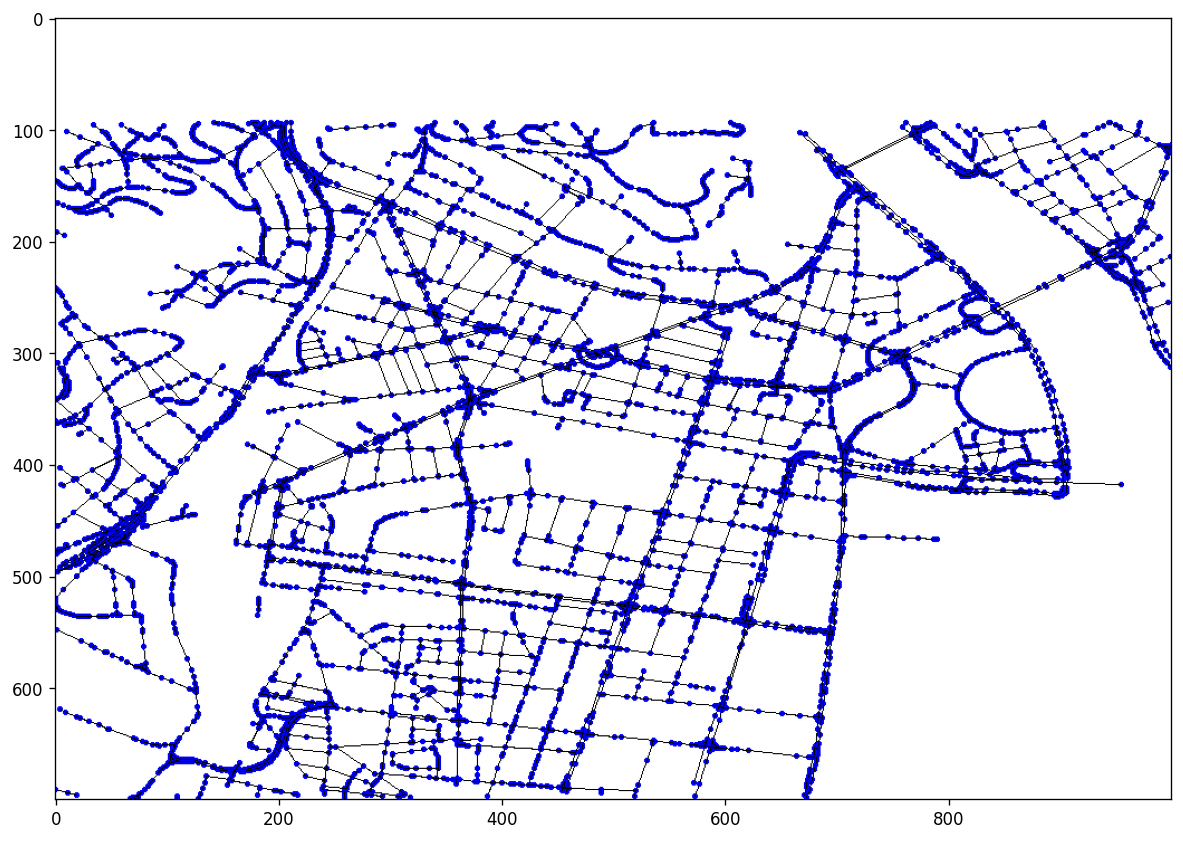

In [2]:
from Map import Map
import math
import random

map = Map('11ker.osm')
map.show()

A fenti kódrészlet az 11ker.osm fájlt tölti be és jeleníti meg. Azonosítsa a feliratok nélküli a térképeken a BME I épület helyét illetve a Schönherz Kollégiumot! Amennyiben segítségre van szüksége ehhez, használja a [Google Maps](https://www.google.com/maps/@47.4721234,19.0510429,16z) felületét!

A következő lépésben a keresési térhez kapcsolódó néhány kódrészlettel kell megismerkednie.

# Keresési algoritmusok impelentációja


## A keresési tér implementálása

A problématér reprezentációját megoldják a Map.py fájlban letöltött Map és Location osztályok, így azokkal itt nem foglalkozunk. A keresési térben történő gráf építéshez szükségünk lesz egy SearchNode osztályra, mely a keresési tér csomópontjait tartja majd nyilván. Minden csomópont az alábbi attribútumokkal rendelkezik majd:

*   location: Egy, a problématérben definiált pont, melyet a keresési térben ez a csomópont reprezentál
*   parent: A keresési térben az a SearchNode, melynek kifejtésével a jelenlegi SearchNode-hoz elértünk
*   cost: A kiindulási ponttól eddig a pontig tartó teljes út költség (jelen esetben az út hossza idáig)

Értelmezze, majd futtassa le az alábbi kódrészletet, ezzel definálva a SearchNode osztályt:

In [3]:
# SearchNode represents a node in the search tree
class SearchNode:
    # Set location, parent node and summed cost to this node
    def __init__(self, location, parent, cost):
        self.location = location
        self.parent = parent
        self.cost = cost

    # Convert the node to string (the parent id is also displayed when present)
    def __str__(self):
        if self.parent != None:
            return '<location={}, parent={} >'.format(self.location.id,self.parent.location.id)
        return '<location={}>'.format(self.location.id)

    # Node equality is defined by the location on the map represented by the node
    def __eq__(self, other):
        if (other == None):
            return False
        return self.location == other.location

A bevezetőben vázlatosan leírt általános keresési algoritmus működést fogjuk az alábbiakban jóval formálisabban impelementáció formájában rögzíteni. Az itt implementált SearchFrame működése teljesen általános, az minden, a labor során megvalósított algoritmusra megegyezik. Magukat az algoritmus implementációkat a későbbiekben feladatként megvalósított NodeSelector osztályokban helyezzük majd el.

A működés során a keretrendszer két listát tart nyilván:
* openList: Ezen a listán vannak a keresési térnek azon pontjai, melyek kifejtésre várnak.
* closedList: Ezen a listán vannak a keresési térnek azon pontjai, amelyeket már felkerestünk egyszer.

A keresés alaphelyzetbe állítását a resetSearch függvény végzi:
* törli az openList és a closedList tartamát és minden egyéb kapcsolódó adatszerkezetet
* ezt követően felveszi a kezdő csomóponthoz tartozó pontot a keresési térben az openList-re

A keresést a step függvény futtatja a paraméterként kapott számú lépés megtételével. A step működése a következő:
* ha nincs több csomópont az openList-en, akkor a keresés kudarccal ér véget
* ha van legalább egy csomópont az openList-en, akkor meghívjuk az aktív nextNodeSelector.nextNode függvényét, ami az éppen implementált keresési módszernek megfelelően választ egy csomópontot az openList-ről kifejtésre
* ha a kiválasztott csomópont egy célcsomópont, akkor készen vagyunk, visszaadjuk az odáig vezető útvonalat és kilépünk
* ha a kiválasztott csomópont nem cél, akkor minden szomszédját felvesszük az openList-re, amely még nem szerepel az openList-en vagy a closedList-en
* végül az éppen feldolgozott csomópontot töröljük az openList-ről és felvesszük az closedList-re

Fussa át az alábbi, alaposan kommentezett kódrészletet, és értelmezze a működését! Ha kérdése van, forduljon a laborvezetőhöz! Ha minden világos, akkor futtassa a blokkot, hogy létrejöjjön a SearchFrame osztály!

In [4]:
# The framework running the algorithms
class SearchFrame:
    map = None                  # The map the search is running on
    start = None                # A single node representing the start to search from
    targets = []                # Multiple target nodes all equally accepted as a valid target

    openList = []               # Search nodes waiting for being selected are on the open list
    closedList = []             # Search nodes already explored are on the closed list
    pathFound = []              # The path the search finds from the start node to one of the target nodes

    nextNodeSelector = None     # The next node selection logic, this class determines the type of search we are running
    verbose = False             # By default do not print to console every node selected
    heurErrorRatio = 0          # Amount of error of heuristics calculations


    # Set the map to work on
    def __init__(self, map):
        self.map = map

    # Set start node, add to the open list and set color to red
    def setStart(self, start):
        self.start = self.map.locations.get(start)
        self.openList.clear()
        self.openList.append(SearchNode(self.start,None,0))
        self.map.setLocationAnnotation(self.start,1)
        self.stepCount = 0

    # Add new location to the target list and set display color to green
    def addTarget(self, target):
        newTarget = self.map.locations.get(target)
        self.targets.append(newTarget)
        self.map.setLocationAnnotation(newTarget,2)


    # Reset the search framework before restarting the search
    def resetSearch(self):
        # Reset internal lists
        self.openList.clear()
        self.closedList.clear()
        self.pathFound.clear()

        # Reset annotations displayed on the map
        self.map.clearAnnotations()

        # Add start node to openList
        self.openList.append(SearchNode(self.start,None,0))
        self.map.setLocationAnnotation(self.start,1)

    # Clear all prevously set target
    def clearTargets(self):
      self.targets.clear()

    # Calculate heuristic value for the given location
    def heur(self, location):
        # Calculate the heuristic value against all targets and return the smallest value
        minValue = -1
        for target in self.targets:
            # Euclidean distance is used as an acceptable heuristic in this flat world problem
            currentValue = math.sqrt(math.pow(location.lat-target.lat,2)+math.pow(location.lon-target.lon,2))
            if minValue == -1 or minValue>currentValue:
                minValue = currentValue
        # Convert the results into meters (road length in the OSM map are in meters)
        meterValue = minValue*100000

        # Add white noise to the heuristic value if set so
        if self.heurErrorRatio > 0:
          errorValue = meterValue*self.heurErrorRatio*(random.random()*2-1)
          meterValue = meterValue + errorValue
        return meterValue

    # Run the given number of steps of the present search algorithm
    def step(self, stepNumber = 1):
        for i in range(0,stepNumber):
            self.stepCount = self.stepCount + 1
            if len(self.openList) == 0:
                # No more candidates, no path found from start to target.
                print('Openlist is empty. Giving up.')
                return

            # Select the next node to explore
            selectedNode = self.nextNodeSelector.nextNode(self, self.openList, self.closedList)

            # In verbose mode print selected node to console
            if self.verbose:
                print('Next node: {}'.format(selectedNode))

            # If something goes wrong in the nextNodeSelector, let's interrupt
            if selectedNode == None or selectedNode not in self.openList:
                print('The NextNodeSelector returned an invalid node: {}'.format(selectedNode))
                return

            # If the selected node is a target, the path is just found from start to target
            if selectedNode.location in self.targets:
                print('Target {} reached in {} steps and {} cost.'.format(selectedNode.location.id, self.stepCount, selectedNode.cost))
                # Track back the path from the found target to the start to build and display the found path
                while selectedNode.parent != None:
                    self.pathFound.append(selectedNode.parent)
                    self.map.setLocationAnnotation(selectedNode.location,5)
                    selectedNode = selectedNode.parent
                # The search can terminate now
                break

            # Transferring the selected node from openlist to closedlist
            self.openList.remove(selectedNode)
            self.closedList.append(selectedNode)
            self.map.setLocationAnnotation(selectedNode.location,4)

            # Adding all neighbours to the openlist
            for road in selectedNode.location.roads:
                otherEnd = SearchNode(road.endLocation,selectedNode,selectedNode.cost+road.length)
                if otherEnd in self.openList:
                    # Skipping: already in openlist
                    continue;
                if otherEnd in self.closedList:
                    # Skipping: already in closedlist
                    continue;
                self.openList.append(otherEnd)
                self.map.setLocationAnnotation(road.endLocation,6)
        # Display the map after the given number of steps or if the algorithm terminates
        self.map.show()

Hozzuk létre a keretrendszer egy példányát, állítsuk be az I épületet kiinduló pontnak és a Schönherz kollégiumot célpontnak!

In [5]:
search = SearchFrame(map)
search.resetSearch()
search.setStart("305572355")
search.addTarget("60488184")

## A szélességi keresés implementálása

A szélességi keresés működése során mindig azt a csomópontot választja az openList-ről, ami oda a legrégebben került fel. Mivel az openList egy egyszerű indexelt listaként került megvalósításra, így ezt a működés úgy tudjuk leprogramozni, ha a BFSNodeSelector osztályban
mindig az openList első elemét adjuk vissza!

E működést az alábbi egyszerű kódrészlet implementálja. Az alsó három sor a keresést állítja alaphelyzetbe, a frissen létrehozott BFSNodeSelector egy példányát állítja be keresési stratégiaként, majd maximum 1000 lépésig futtatja a keresést! Futtassa le az alábbi blokkot és értékelje a szélességi keresés működését!

Target 60488184 reached in 520 steps and 1040.8713633019463 cost.


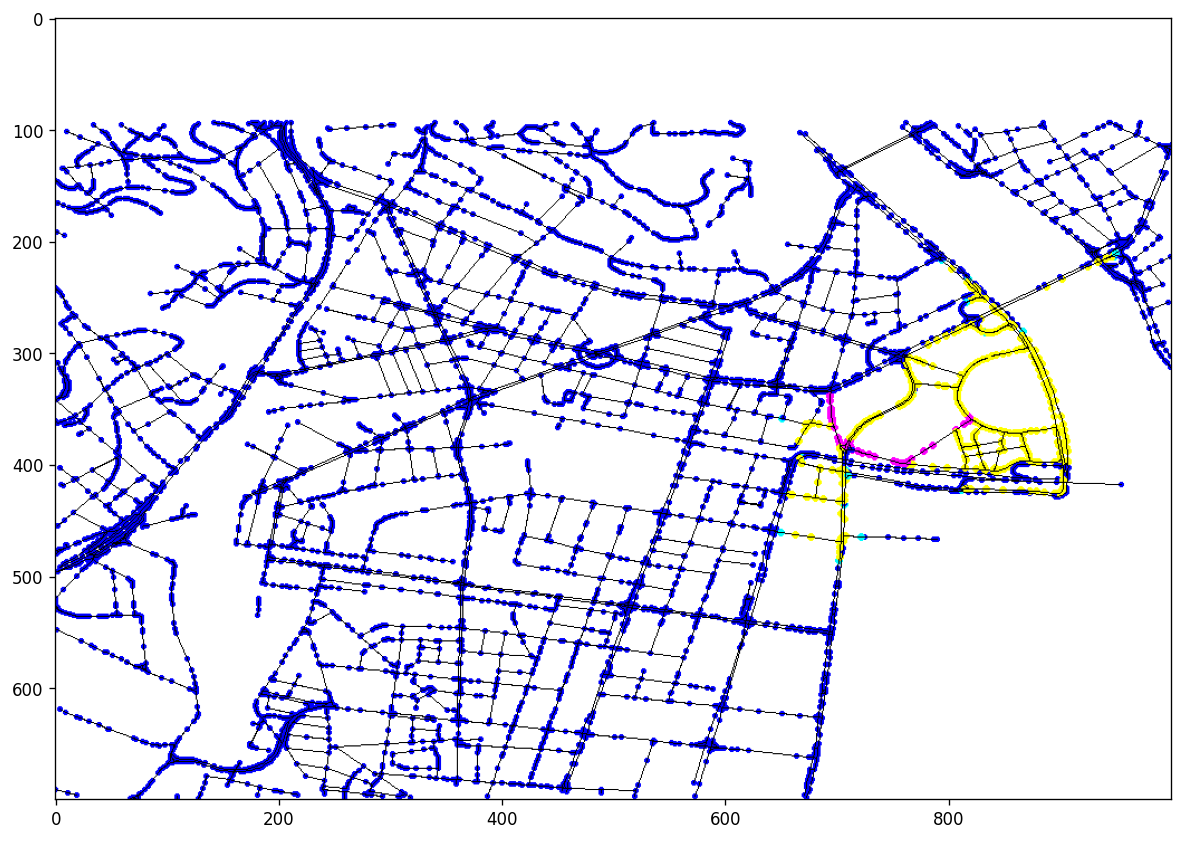

In [6]:
class BFSNodeSelector:
    def nextNode(self, search, openList, closedList):
        return openList[0]


search.resetSearch()
search.nextNodeSelector = BFSNodeSelector()
search.step(1000)

A fenti képen a színek jelentése a következő:
* lila: a megtalált útvonal pontjai
* sárga: a closedList elemei
* cián: az openList elemei
* kék: a térkép olyan további pontjai, melyek nem kerültek a keresés során bejárásra.

Az algoritmus futása alapján a következőket állapíthatjuk meg:
* a szélességi keresés nagyon sok csomópontot kifejt annak érdekében, hogy a teljességet és az optimalitást biztosítani tudja
* a keresés (mint minden nem informált keresés) nem törekszik a célpont irányába, a térben minden irányba sok csomópontot fejt ki
* a szélességi keresés esetén előbb probléma a szükséges tárkapacitás (a sok kifejtett csomópont tárolása miatt), mint a futási idő

## A mélységi keresés implementálása

A szélességi keresés nagy előnye volt a teljesség és az optimalitás, de erős korlátozó tényező a szükséges tárkapacitás. A mélységi keresés mindent a tárkapacitás minimalizálására tesz fel, ezzel azonban fel kell áldoznunk az előbbi két tetszetős tulajdonságot.

A mélységi keresés során mindig az openList-re legutoljára felkerült elemet fejtjük ki, tehát ha egy irányba elindult a keresés, akkor addig halad abba az irányba, ameddig csak lehet!

Implementálja a mélységi keresést olyan módon, hogy a DFSNodeSelector mindig az openList utolsó elemével térjen vissza, majd futtassa az alábbi kódblokkot!

Target 60488184 reached in 3792 steps and 35334.278101838114 cost.


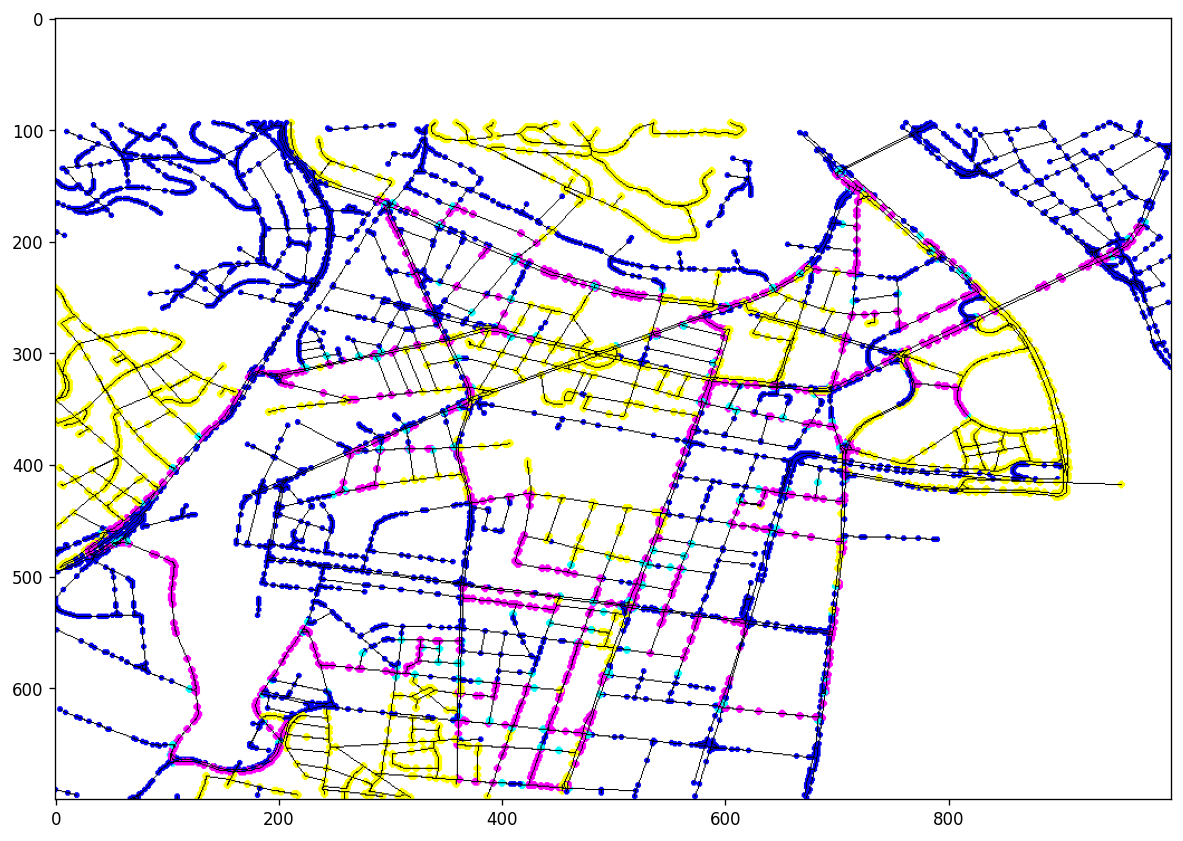

In [7]:
class DFSNodeSelector:
    def nextNode(self, search, openList, closedList):
        return openList[-1]

search.resetSearch()
search.nextNodeSelector = DFSNodeSelector()
search.step(4000)

A mélységi keresés a fél világot bejárja, mielőtt egy szürreálisan hosszú útvonallal vissza nem tér. Könnyű belátni a fenti példa alapján, hogy a mélységi keresés alkalmazása csak akkor indokolt, amikor a szélességi jellegű keresések tárhely korlátba ütköznek!

## Az egyenletes költségű keresés

Az előbbiekben implementált két algoritmus nem vett tudomást arról, hogy az egyes csomópontok között eltérő távolságok lehetnek: minkét algoritmus csak a legrégebben vagy legutóbb az openList-re került csomópontot választotta, azonban a csomópontok kiindulási ponttól mért távolsága alapján adható ennél jobb megoldás is!

Implementálja az egyenletes költségű keresést, ami mindig azt a csomópontot adja vissza az openList-ről, ami a kiindulási ponthoz a legközelebb fekszik! Az openList elemei között a kiindulási ponttól mért távolságot a cost tagváltozó tartalmazza, a feladat tehát az, hogy az openList-ről mindig a legalacsonyabb cost értékű csomópontot adja vissza!

Ha elkészült az implementációval, futtassa a keresést!

Target 60488184 reached in 4245 steps and 1040.8713633019463 cost.


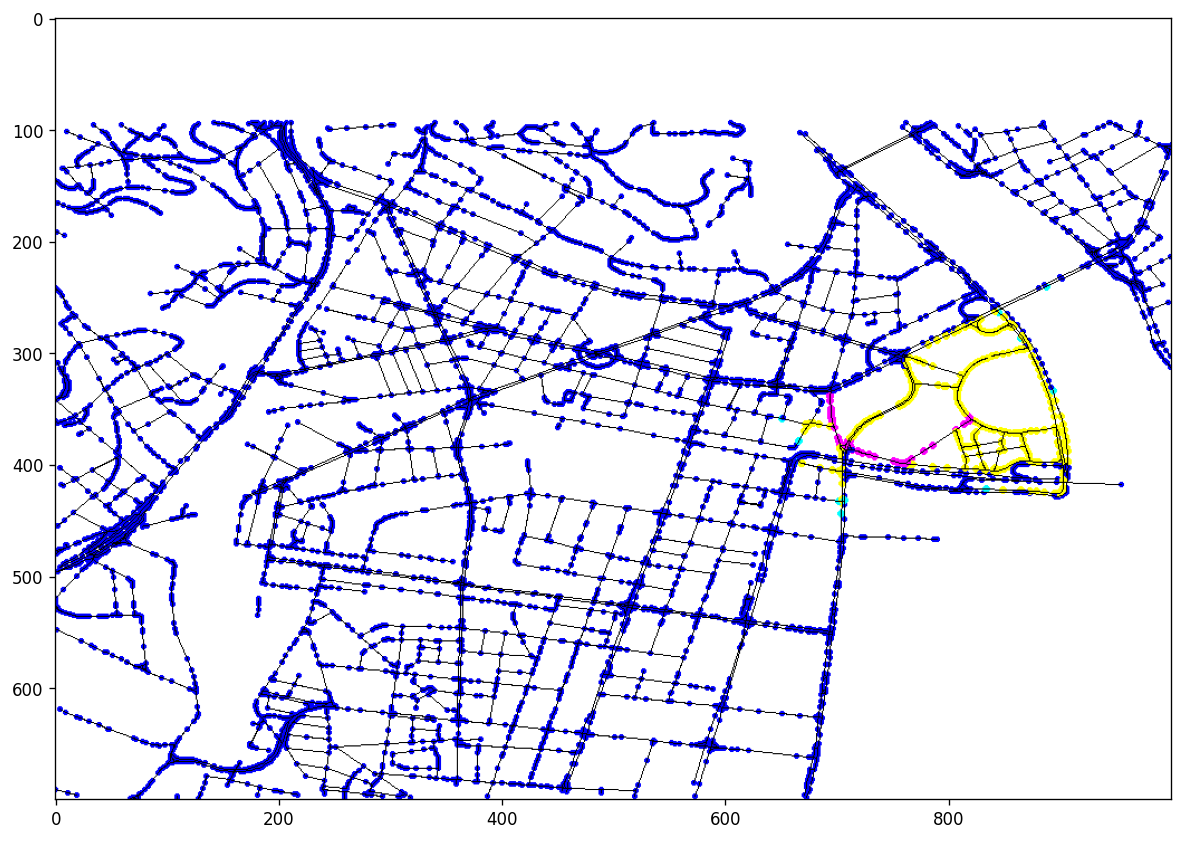

In [8]:
class UniformNodeSelector:
    def nextNode(self, search, openList, closedList):
        return min(openList, key=lambda x: x.cost)

search.resetSearch()
search.nextNodeSelector = UniformNodeSelector()
search.step(1000)

A jelenlegi példánkban elég sűrűn vannak a térkép pontjai lerakva ahhoz, hogy a szélességi és az egyenletes költségű keresés azonos megoldást adjanak, de míg a szélességi keresés lépésszámban, addig az egyenletes költségű keresés a kiinduló ponttól mért távolságban mérve optimális megoldás.

## A mohó keresés

Az eddigiekben implemenált keresésekre általánosan igaz, hogy a térképen minden irányba azonos hajlandósággal indulnak a célt keresni. Ha nincs semmi előzetes információnk a cél irányáról, akkor ennél többet nem lehet tenni, azonban ha van lehetőség informált keresést használni, akkor az mindig sokkal hatékonyabb tud lenni, mint a nem informált keresések!

A térképen való keresés során egy jó heurisztika lehet az egyes pontok közötti légvonalban mért távolság. Ez a heurisztika könnyen számolható, ráadásul az elfogadhatóság feltételét is teljesíti. A légvonalbeli távolság számítását két pont között a SearchFrame.heur függvénye implemenálja.

A mohó keresés működése hasonlít a mélységi keresésre, azzal az eltéréssel, hogy ez a keresés mindig azt a pontot válaszja az openList-ről amit a heurisztika a célhoz legközelebbinek mutat.

Implementálja a mohó keresést a GreedyNodeSelector osztályba úgy, hogy az openList-en található csomópontok közül mindig azt adja vissza, amire a search.heur() függvény a legkisebb heurisztika értéket adja, majd futtassa a keresést az alábbi kódrészlettel!

Target 60488184 reached in 4352 steps and 1304.3906325705111 cost.


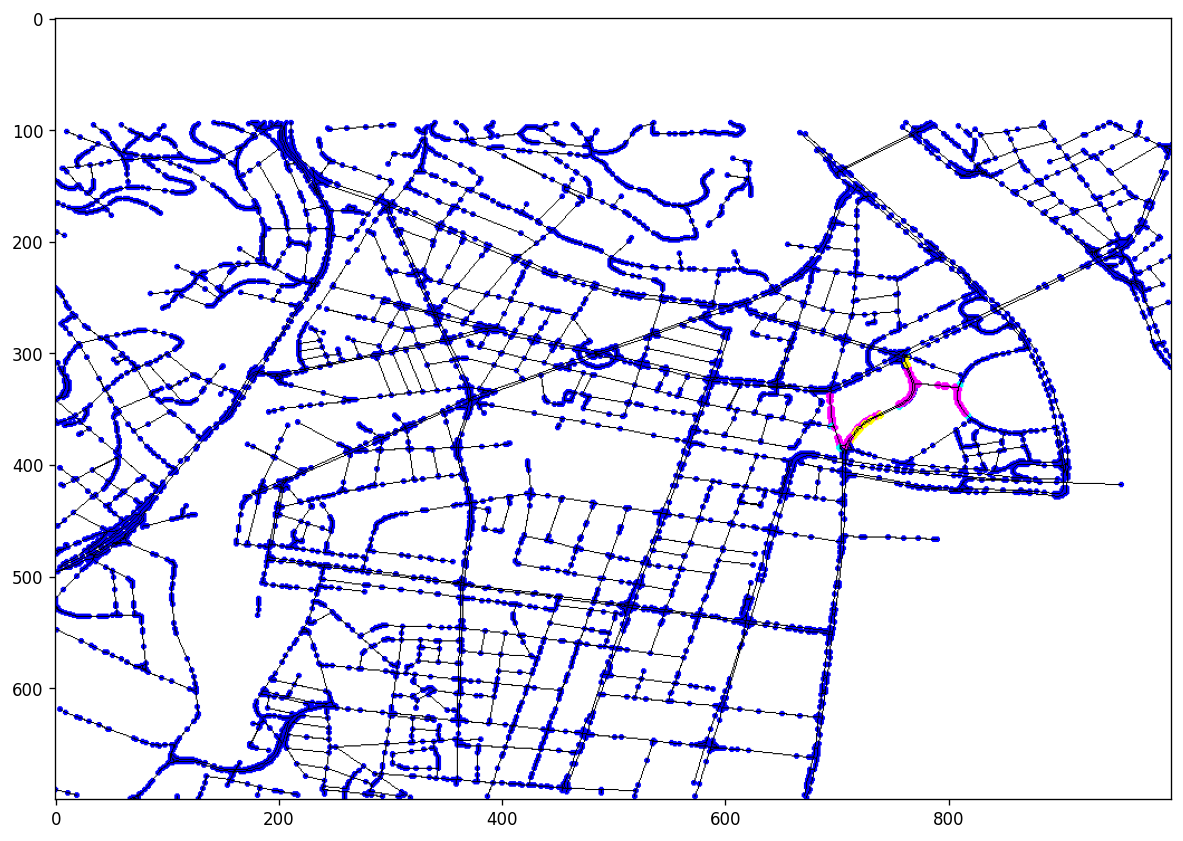

In [9]:
class GreedyNodeSelector:
    def nextNode(self, search, openList, closedList):
        return min(openList, key=lambda x: search.heur(x.location))

search.resetSearch()
search.nextNodeSelector = GreedyNodeSelector()
search.step(1000)

A fenti futás alapján jól látszik a mohó keresés nagy előnye és egyben nagy hátránya is:
* a mohó keresés nagyon hatékonyan talált utat a célig, szinte alig fejtett ki felesleges csomópontokat a keresés során
* cserébe viszont a megtalált út nem optimális, hanem annál 25%-al hosszabb


## Az A* keresés

Az A* keresés a mohó keresés célirányosságát és hatékonyságát ötvözi az egyenletes költségű keresés teljességével és optimalitásával. A gyakorlatban ez úgy történik, hogy nem csak a cél közelségét (a heurisztikát) vagy csak a megtett út hosszát (az eddigi útköltséget) veszi figyelembe, hanem ezek összegét. Így a keresés egyszerre törekszik hatékonyan a cél irányába, és kerüli el a túl költségessé váló kerülőutakat.

Implementálja az A* keresést úgy, hogy az AStarNodeSelector az openList-ről mindig azt a csomópontot adja vissza, amelynek a heurisztika (search.heur() érték) és az útköltség (node.cost érték) összege a legkisebb!

Futtassa az elkészült keresést az alábbi blokkal!

Target 60488184 reached in 4537 steps and 1040.8713633019463 cost.


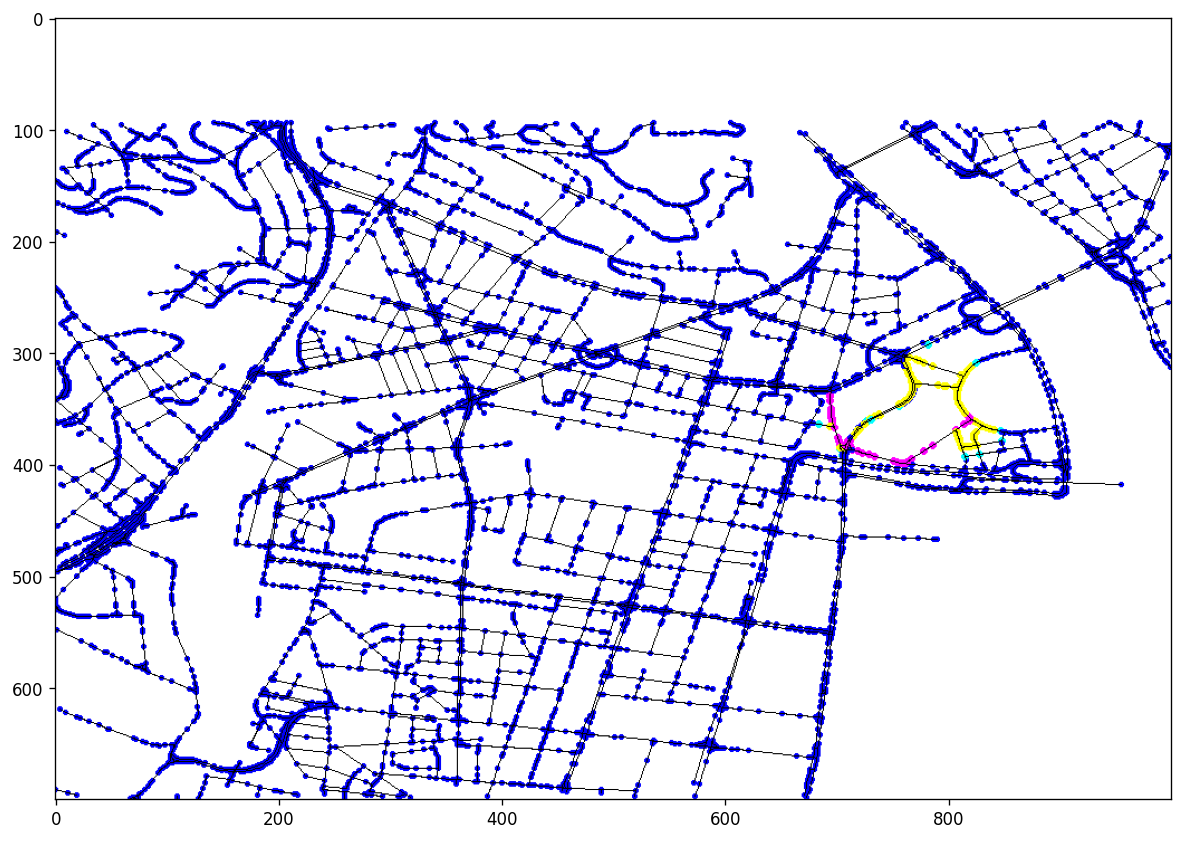

In [10]:
class AStarNodeSelector:
    def nextNode(self, search, openList, closedList):
        return min(openList, key=lambda x: search.heur(x.location) + x.cost)

search.resetSearch()
search.nextNodeSelector = AStarNodeSelector()
search.step(1000)

Hasonlítsa össze az eredményeket a mohó kereséssel (az útvonal hosszára tekintettel), illetve az egyenletes költségű kereséssel (a kifejtett csomópontok számára vonakozóan)!

A fenti futtatás egy nagyon idealizált képet mutat, ugyanis egy nagyon pontos, mégis elfogadható heurisztika állt rendelkezésünkre az euklideszi távolság formájában. Általában a problémák többségében nem elérhető hasonlóan pontos heurisztika, amit a következő teszt során úgy szimulálunk, hogy a heurisztika értékéhez minden alkalommal 50% zajt keverünk.

Futtassa a keresést az alábbi blokk használatával, és értékelje a heurisztika pontosságának "romlása" miatt tapasztalható változásokat!




Target 60488184 reached in 4800 steps and 1071.7662580551537 cost.


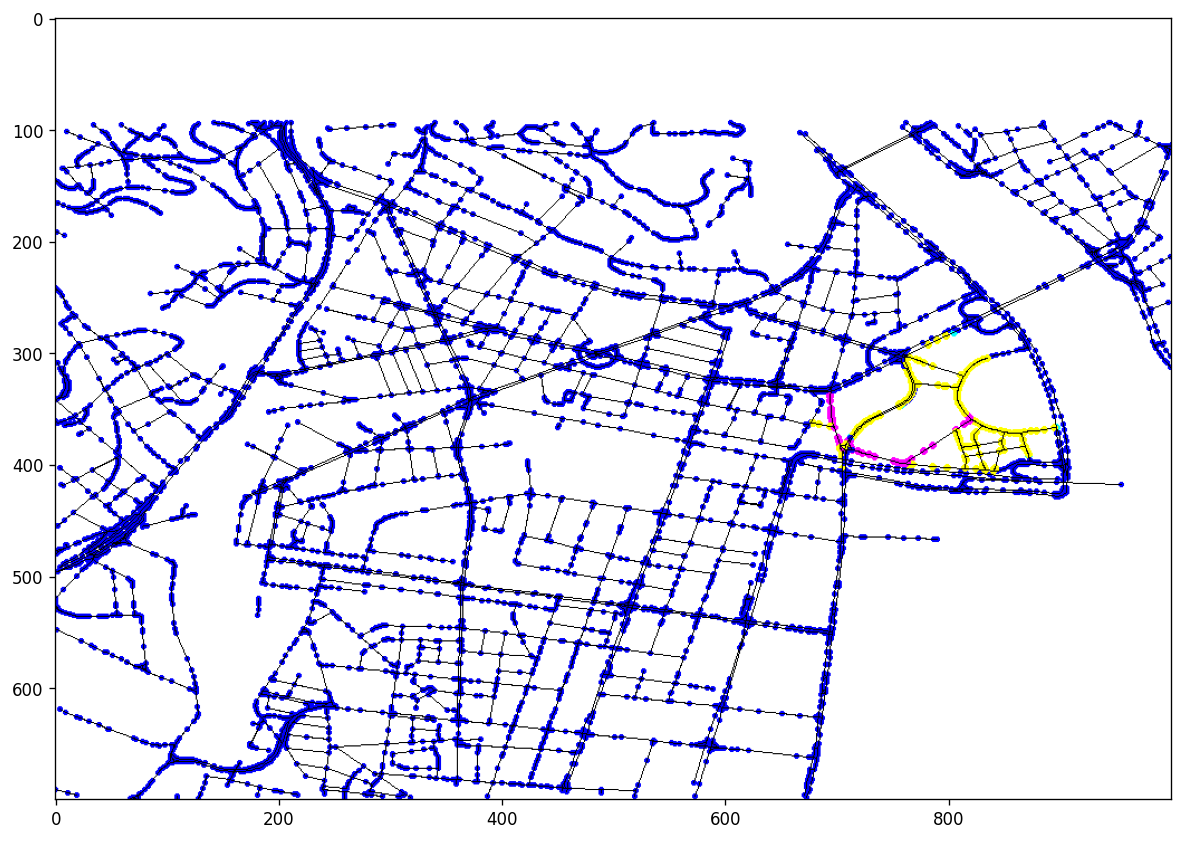

In [11]:
search.resetSearch()
search.nextNodeSelector = AStarNodeSelector()
search.heurErrorRatio = 0.5
search.step(1000)

## További kísérletezési lehetőség

Az alábbi kódblokk használatával testreszabottan futtathatja a fentiekben implementált algoritmusokat. Kísérletezzen a különböző kiindulási- és célpontokkal (akár több célpontot megadva)!  Módosítsa a heurErrorRatio értékét, hogy kisebb és nagyobb heurisztika hibák mellett is tesztelni tudja az algoritmusokat!

Néhány nevezetes pont ID-ja a térképen:

* 305572355 = BME I épület
* 60488184 = Schönherz Kollégium
* 5685085323 = Kelenföld vasútállomás
* 2440711784 = Móricz Zsigmond körtér
* 263005283 = Kosztolányi tér
* 460402844 = Szent Gellért tér

Target 5685085323 reached in 4861 steps and 25775.206203683018 cost.


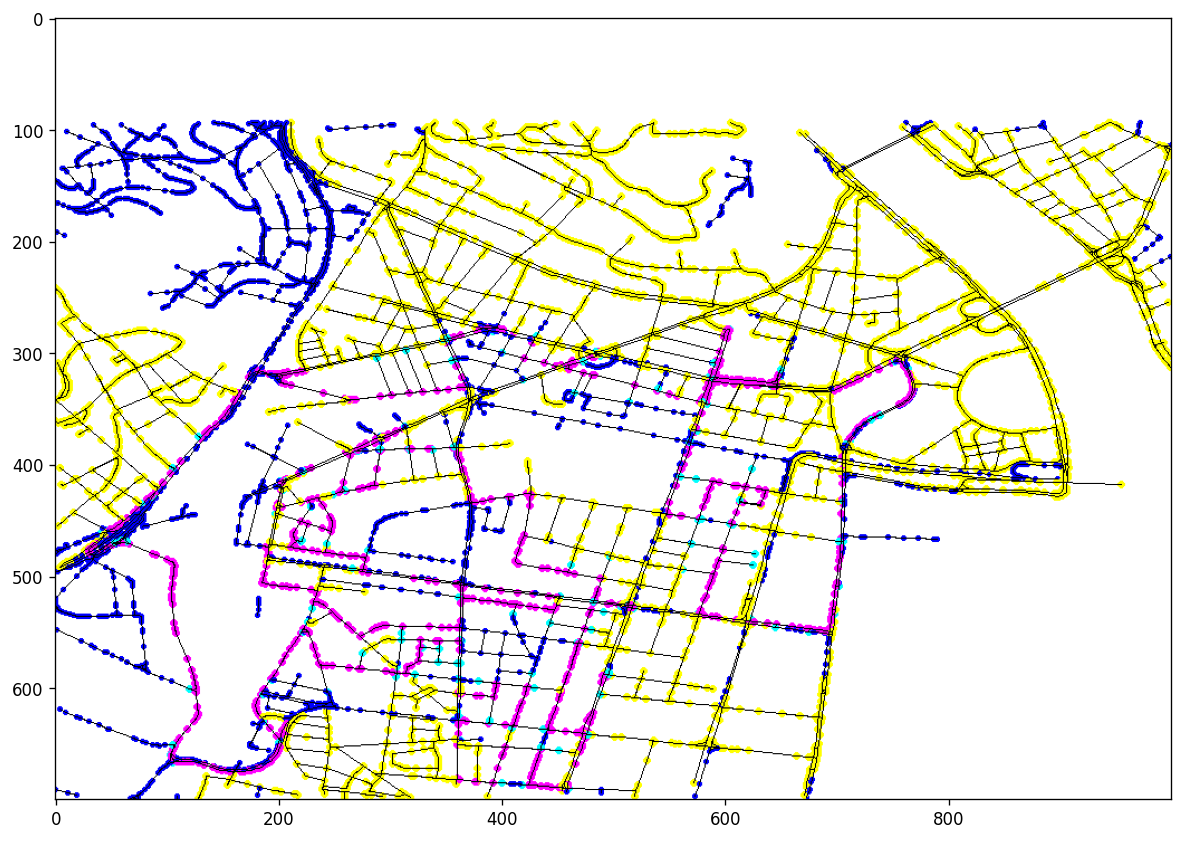

In [14]:
#map = Map('11ker.osm')
search = SearchFrame(map)
search.resetSearch()
search.clearTargets()
search.setStart("60488184")
search.addTarget("5685085323")

#search.nextNodeSelector = BFSNodeSelector()
search.nextNodeSelector = DFSNodeSelector()
#search.nextNodeSelector = UniformNodeSelector()
#search.nextNodeSelector = GreedyNodeSelector()
#search.nextNodeSelector = AStarNodeSelector()

search.heurErrorRatio=0

search.step(5000)

# **Feladatbeadás**

**A feladat teljesítéséhez módosítsa az `astarsearch.py` fájl alábbi szkeletonját úgy, hogy a `nextNode` függvény az A* keresésnek megfelelő módon válassza ki a következő kifejtendő csomópontot, majd töltse fel a fájlt a Moodle rendszerbe!**

In [15]:
class AStarNodeSelector:
    def nextNode(self, search, openList, closedList):
        return min(openList, key=lambda x: search.heur(x.location) + x.cost)

A laborhoz tartozó Moodle-feladat akkor számít teljesítettnek, hogyha a keresés a legoptimálisabb útvonalat adja vissza, ésszerűen alacsony számú lépést követően.

> **Fontos:** A feladat beadásánál figyeljen oda arra, hogy a beadott fájl neve `astarsearch.py` legyen, és kizárólag a `nextNode` függvény törzsét (megjelölt rész) módosítsa!